In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:

import numpy as np 
import pandas as pd
import seaborn as sns
import os
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers.core import Activation, Dropout, Dense

from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
df = pd.read_csv("/content/gdrive/My Drive/Machine learning/IMDB.csv")

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


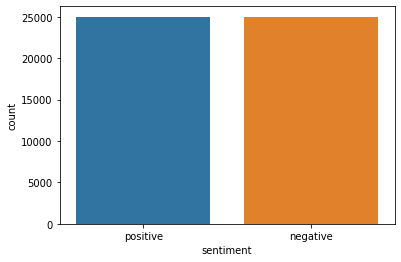

In [24]:
#df['split'] = np.random.randn(df.shape[0],1)   # them cot split co gia tri theo pp chuan, df.shape[0] = 50000
print (df)
sns.countplot(x='sentiment', data=df)

In [25]:
#Preprocessing
def preprocess_text(sen):
  # Xoa the html
  sentence = remove_tags(sen)

  # Xoa dau cau va so
  sentence = re.sub('[^a-zA-Z]', ' ', sentence)

  # Xoa ki tu don
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

  # Xoa nhieu space
  sentence = re.sub(r'\s+', ' ', sentence)

  return sentence

tag_re = re.compile(r'<[^>]+>')
def remove_tags(text):
  return tag_re.sub('', text) 

x = []  # x[i] chua 1 cmt da duoc tien xu ly
sentences = list(df['review'])
for sen in sentences:
  x.append(preprocess_text(sen))
#print (x[3])

# Chuyen doi label: positive->1, negative->0
y = df['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))   # y[i] chua label duoc chuyen dang so 0,1

# Chia dataset thanh training set and testing set
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)
print(x_train[1])
print(y_train)

Wow here it finally is the action movie without action In real low budget setting don miss the hilarious flying saucers flying by few times of future Seattle we find no brain hardbody seeking to avenge her childhood There is nothing even remotely original or interesting about the plot and the actors performance is only rivalled in stupidity by the attempts to steal from other movies mainly Matrix without having the money to do it right Yes we do get to see some running on walls and slow motion shoot outs secs approx but these scenes are about as cool as the stupid hardbody attempts at making jokes about male incompetence now and then And yes we are also served number of leads that lead absolutely nowhere as if the script was thought out by the previously unseen cast while shooting the scenes Believe me it is as bad as it possibly can get In fact it doesn deserve to be taken seriously but perhaps can make some of you not rent it and save your money 
[0 0 1 ... 0 1 1]


In [26]:
t = time()
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
duration = time() - t
print("Time taken to extract features from training data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % x_train_tfidf.shape)

Time taken to extract features from training data : 4.076116 seconds
n_samples: 25000, n_features: 76004


In [27]:
t = time()
x_test_tfidf = tfidf_vectorizer.transform(x_test)
duration = time() - t
print("Time taken to extract features from test data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % x_test_tfidf.shape)

Time taken to extract features from test data : 4.197620 seconds
n_samples: 25000, n_features: 76004


In [28]:
# build naive bayes classification model
t = time()
naive_bayes_classifier = MultinomialNB()

naive_bayes_classifier.fit(x_train_tfidf, y_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.036s


In [29]:
# predict the new document from the testing dataset
t = time()
y_pred = naive_bayes_classifier.predict(x_test_tfidf)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.5f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

test time:  0.025s
accuracy:   0.86052
              precision    recall  f1-score   support

    Positive       0.84      0.89      0.86     12483
    Negative       0.88      0.83      0.86     12517

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

confusion matrix:
[[11063  1420]
 [ 2067 10450]]
------------------------------
